In [70]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import reprlib

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plot 

df = pd.read_csv(r'E:\Projects\movies.csv')

In [4]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [73]:
# Let's see if there is any missing data

for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing)) 

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [71]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [74]:
# changing datatype of columns 'budget' and 'gross' from the default float64 to int64

#df['budget'] = df['budget'].astype('int64')
#df['gross'] = df['gross'].astype('int64')

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 
df['votes'] = pd.to_numeric(df['votes'], errors ='coerce').fillna(0).astype(int)


In [93]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,2019-07-19,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,2015-06-12,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,2012-05-04,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


In [95]:
# Creating the correct year column

#df['released'] = pd.to_datetime(df['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format = '%B %d, %Y')
df['yearcorrect'] = df['released'].astype(str).str[0:4]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,2019-07-19,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,2015-06-12,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,2012-05-04,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


In [78]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [106]:
pd.set_option('display.max_rows', 20)

In [107]:
# drop any duplicates

df['company'].drop_duplicates().sort_values(ascending = False)


7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
3776                         double A Films
524               Zupnik-Curtis Enterprises
3330            Zucker Brothers Productions
520                        Zoetrope Studios
                       ...                 
2929                          1492 Pictures
3787                         13 Productions
6975                            120dB Films
4054                              120 Films
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
7657                                    NaN
Name: company, Length: 2386, dtype: object

In [96]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,2019-07-19,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,2015-06-12,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,2012-05-04,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


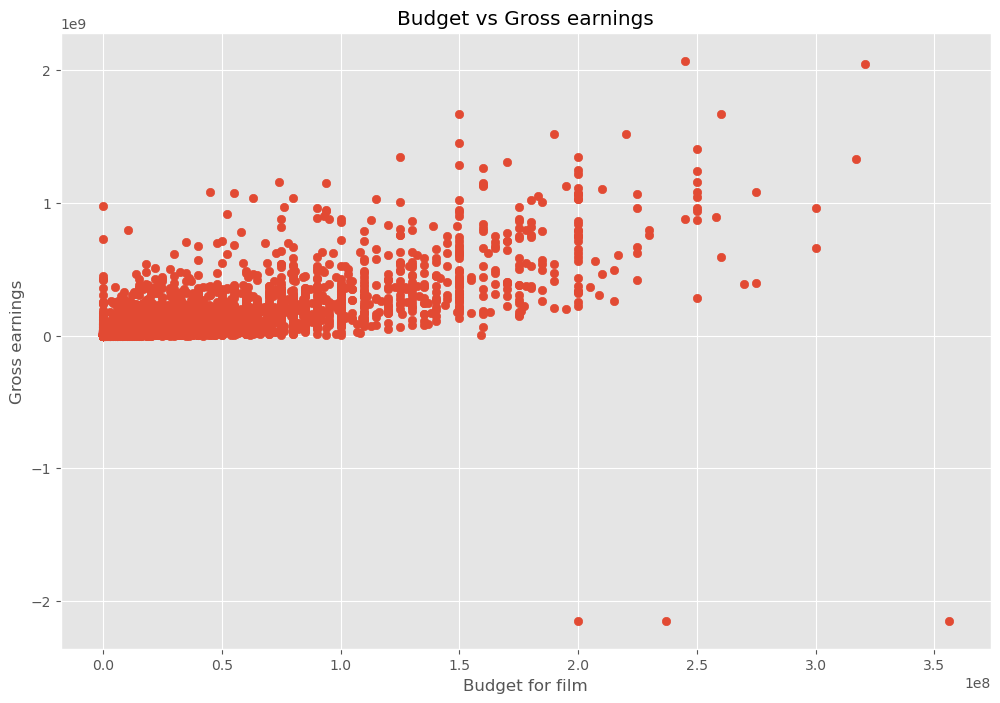

In [80]:
# Scatter Plot with Budget vs Gross

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross earnings')

plt.xlabel('Budget for film')

plt.ylabel('Gross earnings')

plt.show()

In [34]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,2069521700,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,2048359754,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,2019-07-19,6.9,1670727580,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,2015-06-12,7.0,1670516444,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,2012-05-04,8.0,1518815515,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


<AxesSubplot:xlabel='budget', ylabel='gross'>

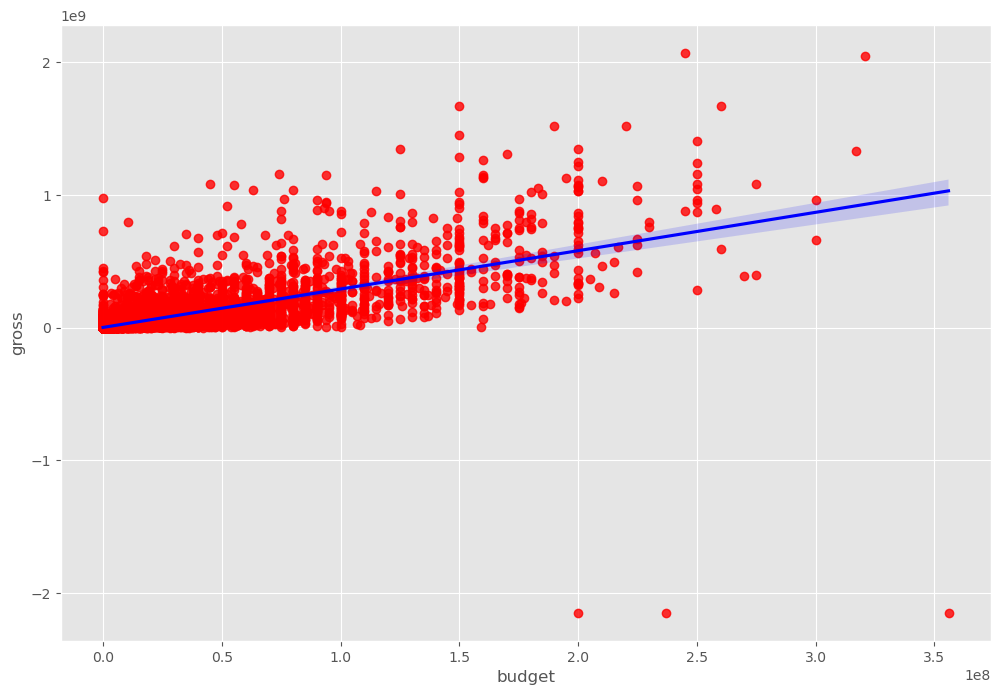

In [81]:
# Plot the Buget vs Gross using seaborn

sns.regplot(x ='budget', y = 'gross', data = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "Blue"}) 

In [ ]:
# Lets start looking at correlation

In [82]:
df.corr() 

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.256331,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.169406,0.399451
votes,0.222427,0.409182,1.000000,0.486931,0.573930,0.309122
budget,0.309212,0.055665,0.486931,1.000000,0.687124,0.269510
gross,0.256331,0.169406,0.573930,0.687124,1.000000,0.204177
runtime,0.120811,0.399451,0.309122,0.269510,0.204177,1.000000


In [44]:
# High correlation between budget and gross

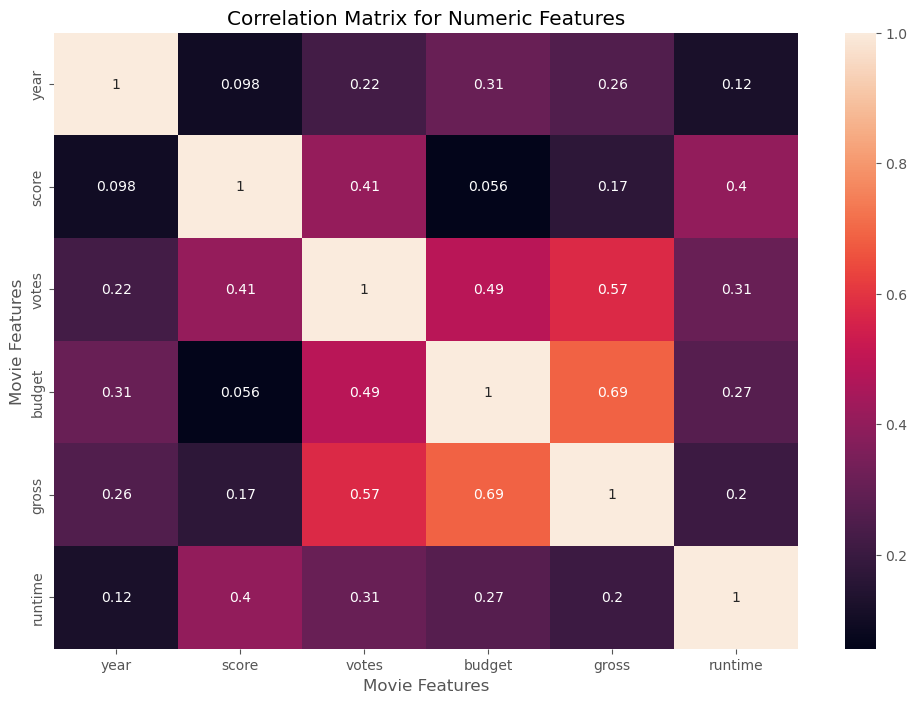

In [83]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [49]:
# Looks as company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,2069521700,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,2048359754,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,2019-07-19,6.9,1670727580,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,2015-06-12,7.0,1670516444,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,2012-05-04,8.0,1518815515,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


In [111]:
df_numberized = df

for col_name in df_numberized.columns:
    if(df_numberized[col_name].dtype == 'object'):
        df_numberized[col_name] =  df_numberized[col_name].astype('category')
        df_numberized[col_name] = df_numberized[col_name].cat.codes
            
df_numberized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5144,5,0,2015,2015-12-18,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,2018-04-27,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,38
7480,6194,4,2,2019,2019-07-19,6.9,222000,1455,1919,676,55,260000000,1670727580,2316,118.0,39
6653,2969,5,0,2015,2015-06-12,7.0,593000,517,3568,437,55,150000000,1670516444,2281,124.0,35
6043,5502,5,0,2012,2012-05-04,8.0,1300000,1517,2314,2241,55,220000000,1518815515,1606,143.0,32
6646,2145,5,0,2015,2015-04-03,7.1,370000,1189,706,2721,55,190000000,1515341399,2281,137.0,35
7494,2131,4,2,2019,2019-11-22,6.8,148000,432,1950,1527,55,150000000,1450026933,2315,103.0,39
6644,534,5,0,2015,2015-05-01,7.3,777000,1517,2314,2241,55,250000000,1402809540,1606,141.0,35
7247,791,5,0,2018,2018-02-16,7.3,661000,2457,3795,385,55,200000000,1347597973,1606,134.0,38
5845,2407,5,1,2011,2011-07-15,8.1,790000,679,4052,552,54,125000000,1342321665,2319,130.0,31


In [110]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,2019-07-19,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,2015-06-12,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,2012-05-04,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
6646,Furious 7,PG-13,Action,2015,2015-04-03,7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015
7494,Frozen II,PG,Animation,2019,2019-11-22,6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019
6644,Avengers: Age of Ultron,PG-13,Action,2015,2015-05-01,7.3,777000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000,1402809540,Marvel Studios,141.0,2015
7247,Black Panther,PG-13,Action,2018,2018-02-16,7.3,661000,Ryan Coogler,Ryan Coogler,Chadwick Boseman,United States,200000000,1347597973,Marvel Studios,134.0,2018
5845,Harry Potter and the Deathly Hallows: Part 2,PG-13,Adventure,2011,2011-07-15,8.1,790000,David Yates,Steve Kloves,Daniel Radcliffe,United Kingdom,125000000,1342321665,Warner Bros.,130.0,2011


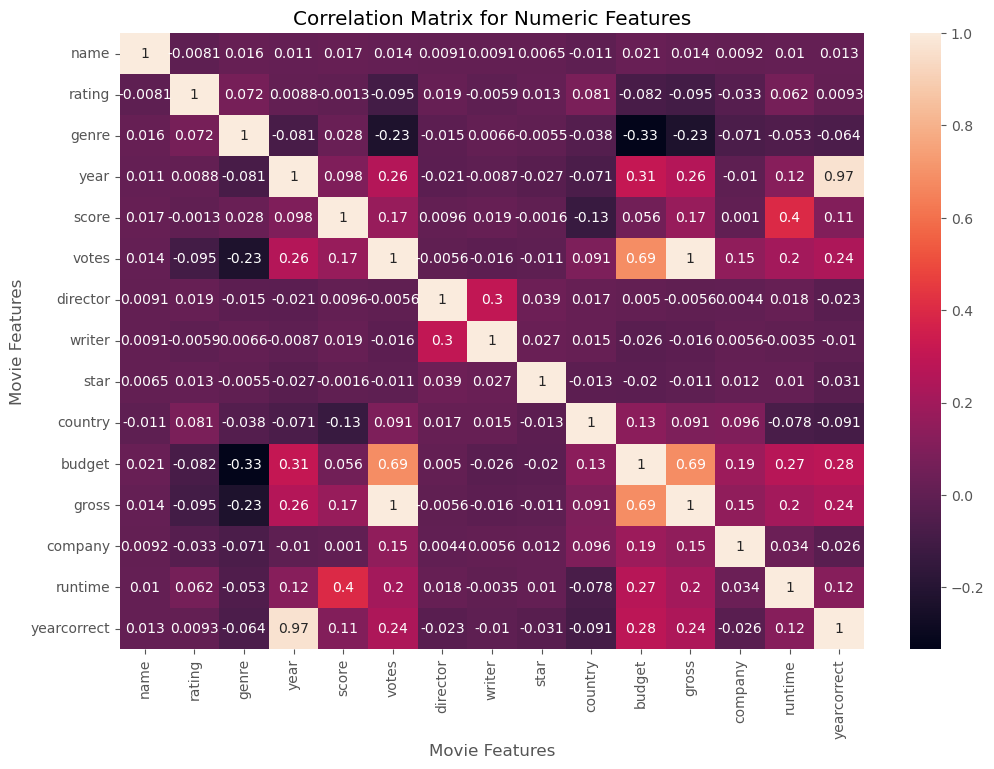

In [85]:
correlation_matrix = df_numberized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [87]:
df_numberized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,0.017097,0.013895,0.009079,0.009081,0.006472,-0.010737,0.020548,0.013895,0.009211,0.010392,0.012835
rating,-0.008069,1.000000,0.072423,0.008779,-0.001314,-0.095355,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095355,-0.032943,0.062145,0.009280
genre,0.016355,0.072423,1.000000,-0.081261,0.027965,-0.229534,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.229534,-0.071067,-0.052711,-0.063573
year,0.011453,0.008779,-0.081261,1.000000,0.097995,0.256331,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.256331,-0.010431,0.120811,0.967486
score,0.017097,-0.001314,0.027965,0.097995,1.000000,0.169406,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.169406,0.001030,0.399451,0.107219
votes,0.013895,-0.095355,-0.229534,0.256331,0.169406,1.000000,-0.005615,-0.015602,-0.010628,0.091404,0.687124,1.000000,0.148722,0.204177,0.238227
director,0.009079,0.019483,-0.015258,-0.020795,0.009559,-0.005615,1.000000,0.299067,0.039234,0.017490,0.004976,-0.005615,0.004404,0.017624,-0.022579
writer,0.009081,-0.005921,0.006567,-0.008656,0.019416,-0.015602,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.015602,0.005646,-0.003511,-0.010063
star,0.006472,0.013405,-0.005477,-0.027242,-0.001609,-0.010628,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.010628,0.012442,0.010174,-0.031166
country,-0.010737,0.081244,-0.037615,-0.070938,-0.133348,0.091404,0.017490,0.015343,-0.012998,1.000000,0.131720,0.091404,0.095548,-0.078412,-0.090962


In [109]:
correlation_mat = df_numberized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             score          0.017097
             votes          0.013895
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
                              ...   
yearcorrect  votes          0.238227
             director      -0.022579
             writer        -0.010063
             star          -0.031166
             country       -0.090962
             budget         0.284783
             gross          0.238227
             company       -0.026492
             runtime        0.115317
             yearcorrect    1.000000
Length: 225, dtype: float64

In [108]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.229534
gross        genre         -0.229534
votes        genre         -0.229534
genre        votes         -0.229534
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.095355
votes        rating        -0.095355
                              ...   
star         star           1.000000
director     director       1.000000
votes        gross          1.000000
             votes          1.000000
score        score          1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 225, dtype: float64

In [92]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        budget         0.687124
gross        budget         0.687124
budget       votes          0.687124
             gross          0.687124
year         yearcorrect    0.967486
yearcorrect  year           0.967486
name         name           1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
             votes          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        gross          1.000000
             votes          1.000000
score        score          1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget had the highest correlations to gross earnings

# Company has low correlation